In [1]:
 # Import necessary libraries
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Titanic dataset
data = pd.read_csv('../../../../../Downloads/titanic.csv')

In [3]:
data.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [4]:
data.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [5]:
# Data preprocessing
data = data.drop([ 'PClass','Name', 'SexCode'], axis=1)  # Drop unnecessary columns
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)  # One-hot encode categorical variables


In [6]:
# Handling missing values
data.dropna(inplace=True)

In [7]:
data.head()

,Age,Survived,Sex_male
0,29.00,1,0
1,2.00,0,0
2,30.00,0,1
3,25.00,0,0
4,0.92,1,1


In [8]:
data.describe()

,Age,Survived,Sex_male
count,756.000000,756.000000,756.000000
mean,30.397989,0.414021,0.619048
std,14.259049,0.492878,0.485942
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [9]:
# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7631578947368421


In [12]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.7828947368421053


In [13]:
# Compare decision trees with various depths
tree_depths = range(1, 11)
tree_scores = []


In [14]:
for depth in tree_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
    tree_scores.append(np.mean(dt_scores))

In [15]:
tree_scores

[0.7798347107438017,
 0.8013498622589532,
 0.7996969696969696,
 0.7963498622589531,
 0.789724517906336,
 0.7781404958677686,
 0.7765151515151515,
 0.771556473829201,
 0.7632920110192837,
 0.7599862258953167]

In [16]:
# Compare random forests with various numbers of trees
n_estimators = [10, 50, 100, 200]
rf_scores = []

In [17]:
for n in n_estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rft_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
    rf_scores.append(np.mean(rft_scores))

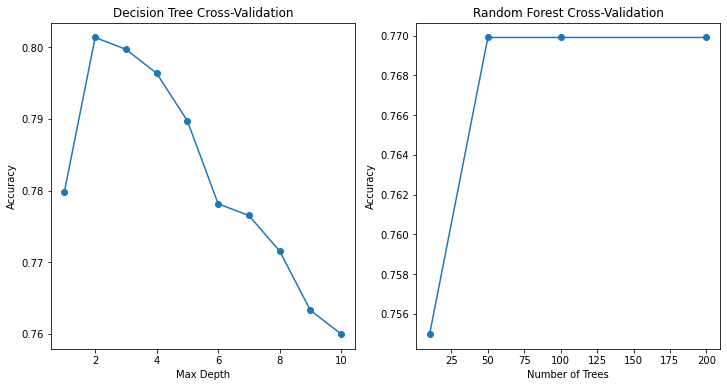

In [18]:
# visualizing the results 
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tree_depths, tree_scores, marker='o')
plt.title('Decision Tree Cross-Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, rf_scores, marker='o')
plt.title('Random Forest Cross-Validation')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.show()